In [2]:
#Parte 1, Ejercicio 1

# Uilizamos la base de datos del TP 3 para ampliar la información que contiene  "Respondieron"
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_excel('C:\\Users\\54115\\Desktop\\BIG DATA\\Python\\TP4\\baseTP3.xlsx')
df = df.drop(columns=['Unnamed: 0','cluster_k2', 'cluster_k4', 'cluster_k10', 'cluster_k2_label'], axis=1, errors='ignore')
no_respondieron = df[df['ESTADO'] == "Entrevista individual no realizada (no respuesta al Cuestionario Individual)"]
respondieron = df[df['ESTADO'] != "Entrevista individual no realizada (no respuesta al Cuestionario Individual)"]
column_names = df.columns.tolist()
len(respondieron)

14657

In [3]:
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
import ISLP as islp
from ISLP.models import ModelSpec
import statsmodels.api as sm
#Creamos la variable dummy correspondiente a "Desocupado" 
respondieron['desocupado'] = (respondieron['ESTADO'] == 'Desocupado').astype(int)

#Añadimos otras dummies para incorporar más información de nuestra base datos al modelo
#Dummies incorporadas
respondieron['mujer'] = respondieron['Sexos Relevados'].map({"Mujer": 1, 'Varón': 0})
respondieron['lee_dummy'] = respondieron['Sabe leer y escribir'].map({'Sí': 1, 'No': 2})
respondieron['vp_dummy'] = respondieron['Tiene Vacaciones Pagas'].map({'Sí': 1, 'No': 2})
respondieron["salario_semanal"]=respondieron["salario_semanal"].round(2)

#Designamos la variable dependiente e independiente
y=respondieron[["desocupado"]]
x=respondieron[['ANO4', 'Ingreso Per Cápita Familiar', 'Años al momento de la encuesta', 'DECCFR', 'IDECCFR',
 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'edad2', 'PP3F_TOT', 'PP3E_TOT', 'P21', 'educ', 'salario_semanal', 'horas_trab', 'mujer', 'vp_dummy']]

#Reemplazamos todos los NaN por ceros y agregamos la columna de unos
x.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
x['intercepto'] = 1
respondieron["desocupado"]

C:\Users\54115\AppData\Local\Temp\ipykernel_28332\2122804421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = (respondieron['ESTADO'] == 'Desocupado').astype(int)
C:\Users\54115\AppData\Local\Temp\ipykernel_28332\2122804421.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['mujer'] = respondieron['Sexos Relevados'].map({"Mujer": 1, 'Varón': 0})
C:\Users\54115\AppData\Local\Temp\ipykernel_28332\2122804421.py:13: SettingWithCopyWarning: 
A value is trying to be 

0        0
1        0
2        0
3        0
4        0
        ..
14693    0
14694    0
14695    0
14696    0
14697    0
Name: desocupado, Length: 14657, dtype: int32

In [4]:
#Parte 1, Ejercicio 2: 

#Debemos conformar nuestro modelo de regresión únicamente para los ocupados de la EPH

# Establecemos primero una base de datos que solo comprenda información para los ocupados de la EPH en nuestra región
ocu=respondieron[respondieron["ESTADO"] == "Ocupado"]

#Creamos la columna de unos
ocu['intercepto'] = 1
ocu.rename(columns={'Años al momento de la encuesta': 'edad'}, inplace=True)
ocu

C:\Users\54115\AppData\Local\Temp\ipykernel_28332\605685891.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocu['intercepto'] = 1
C:\Users\54115\AppData\Local\Temp\ipykernel_28332\605685891.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocu.rename(columns={'Años al momento de la encuesta': 'edad'}, inplace=True)


,Sexos Relevados,REGION,ANO4,Nivel Educativo,Estado Civil,Cobertura Médica,Categoría de Inactividad,Ingreso Per Cápita Familiar,edad,Sabe leer y escribir,...,PP3E_TOT,P21,educ,salario_semanal,horas_trab,desocupado,mujer,lee_dummy,vp_dummy,intercepto
0,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,7.357143e+02,59.0,Sí,...,50.0,NaN,6.0,NaN,50.0,0,1,1.0,NaN,1
1,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,3.416333e+03,46.0,Sí,...,18.0,250.0,6.0,5513.88,18.0,0,1,1.0,NaN,1
14,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,48.0,Sí,...,NaN,NaN,6.0,NaN,0.0,0,1,1.0,NaN,1
17,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,1.666667e+01,50.0,Sí,...,9.0,NaN,6.0,NaN,9.0,0,1,1.0,NaN,1
19,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,2.666667e+01,54.0,Sí,...,28.0,NaN,6.0,NaN,28.0,0,1,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14691,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,8.050000e+05,50.0,Sí,...,50.0,800000.0,18.0,20000.00,50.0,0,0,1.0,1.0,1
14692,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,1.285000e+06,37.0,Sí,...,40.0,380000.0,14.0,9500.00,40.0,0,0,1.0,1.0,1
14695,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,61.0,Sí,...,40.0,535000.0,15.0,13375.00,40.0,0,0,1.0,1.0,1
14696,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,68.0,Sí,...,20.0,NaN,15.0,NaN,20.0,0,0,1.0,NaN,1


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
# Planteamos nuestra matriz X
X_ocu=ocu[["edad","edad2","intercepto","educ","mujer","vp_dummy", "lee_dummy"]]
Y_ocu=ocu[["salario_semanal"]]

#Dividimos los datos correspondientes en entrenamiento y testeo

x_train_ocu,x_test_ocu,y_train_ocu,y_test_ocu=train_test_split(X_ocu,Y_ocu,test_size=0.3, random_state=444)

In [6]:
#Regresión de salario_semanal en edad

X_1 = x_train_ocu[["edad", "intercepto"]]
X_1.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_1 = y_train_ocu["salario_semanal"]
Y_1.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_1, X_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.39
Date:                Sat, 31 May 2025   Prob (F-statistic):           6.49e-06
Time:                        16:26:40   Log-Likelihood:                -48323.
No. Observations:                4412   AIC:                         9.665e+04
Df Residuals:                    4410   BIC:                         9.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad          67.1859     14.880      4.515      0.0

C:\Users\54115\AppData\Local\Temp\ipykernel_28332\1284707196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [7]:
#salario_semanal en edad y edad2
X_2 = x_train_ocu[["edad", "edad2", "intercepto"]]
X_2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_2 = y_train_ocu["salario_semanal"]
Y_2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_2, X_2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     44.71
Date:                Sat, 31 May 2025   Prob (F-statistic):           5.98e-20
Time:                        16:26:49   Log-Likelihood:                -48289.
No. Observations:                4412   AIC:                         9.658e+04
Df Residuals:                    4409   BIC:                         9.660e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         720.0374     80.126      8.986      0.0

C:\Users\54115\AppData\Local\Temp\ipykernel_28332\3347534445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [8]:
#salario_semanal en edad, edad2 y educ
X_3 = x_train_ocu[["edad", "edad2", "intercepto", "educ"]]
X_3.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_3 = y_train_ocu["salario_semanal"]
Y_3.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_3, X_3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     31.87
Date:                Sat, 31 May 2025   Prob (F-statistic):           2.24e-20
Time:                        16:26:54   Log-Likelihood:                -48286.
No. Observations:                4412   AIC:                         9.658e+04
Df Residuals:                    4408   BIC:                         9.661e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         691.5456     80.907      8.547      0.0

C:\Users\54115\AppData\Local\Temp\ipykernel_28332\4157050273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_3.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [9]:
#salario_semanal en edad,edad2, educ y mujer
X_4 = x_train_ocu[["edad", "edad2", "intercepto", "educ", "mujer"]]
X_4.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_4 = y_train_ocu["salario_semanal"]
Y_4.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_4, X_4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     43.30
Date:                Sat, 31 May 2025   Prob (F-statistic):           1.09e-35
Time:                        16:26:59   Log-Likelihood:                -48248.
No. Observations:                4412   AIC:                         9.651e+04
Df Residuals:                    4407   BIC:                         9.654e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         715.7028     80.276      8.916      0.0

C:\Users\54115\AppData\Local\Temp\ipykernel_28332\930480014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_4.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [10]:
#Regresión de salario_semanal en las variables del punto anterior y vp_dummy y lee_dummy
X_5 = x_train_ocu[["edad", "edad2", "intercepto", "educ", "mujer", "vp_dummy", "lee_dummy"]]
X_5.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_5 = y_train_ocu["salario_semanal"]
Y_5.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_5, X_5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     31.91
Date:                Sat, 31 May 2025   Prob (F-statistic):           8.55e-38
Time:                        16:27:13   Log-Likelihood:                -48240.
No. Observations:                4412   AIC:                         9.649e+04
Df Residuals:                    4405   BIC:                         9.654e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         697.9497     80.355      8.686      0.0

In [11]:
# Parte B - Punto 3
# Enfoque de validación

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
# Antes de arrancar, verificamos si existen valores NaN.
print(x_test_ocu.isnull().sum())
print(y_test_ocu.isnull().sum())

edad            0
edad2           0
intercepto      0
educ          417
mujer           0
vp_dummy      516
lee_dummy       1
dtype: int64
salario_semanal    401
dtype: int64


In [13]:
# Ennumeramos variables del 1-5 para cada modelo. Esto va a facilitar el análisis
modelo_variables = {
    1: ['edad', 'intercepto'],
    2: ['edad', 'edad2', 'intercepto'],
    3: ['edad', 'edad2', 'intercepto', 'educ'],
    4: ['edad', 'edad2', 'intercepto', 'educ', 'mujer'],
    5: ['edad', 'edad2', 'intercepto', 'educ', 'mujer', 'vp_dummy', 'lee_dummy']
}

# Observamos previamente que muchas variables tienen NaN.
# Para ello, vamos a imputar valores predictivos; en el caso de la variable educ, usamos la mediana, para las dummies, la moda.
x_test_ocu['educ'] = x_test_ocu['educ'].fillna(x_test_ocu['educ'].median())
x_test_ocu['vp_dummy'] = x_test_ocu['vp_dummy'].fillna(x_test_ocu['vp_dummy'].mode()[0])
x_test_ocu['lee_dummy'] = x_test_ocu['lee_dummy'].fillna(x_test_ocu['lee_dummy'].mode()[0])

# Además, eliminamos filas de la base de testeo donde falta la variable objetivo (salario_semanal).
y_test_ocu = y_test_ocu.dropna(subset=['salario_semanal'])
x_test_ocu = x_test_ocu.loc[y_test_ocu.index]

# Guardamos las métricas
metrics = {}

for i in range(1,6):
    vars_i = modelo_variables[i]
    
    # Preparamos los datos de entrenamiento y entrenamos el modelo
    X_train_i = x_train_ocu[vars_i].replace([np.nan, np.inf, -np.inf], 0)
    Y_train_i = y_train_ocu['salario_semanal'].replace([np.nan, np.inf, -np.inf], 0)
    
    model_i = sm.OLS(Y_train_i, X_train_i)
    results_i = model_i.fit()

    # Preparamos los datos de testeo
    X_test_i = x_test_ocu[vars_i].replace([np.nan, np.inf, -np.inf], 0)
    Y_test_true = y_test_ocu['salario_semanal']
    coef_i = results_i.params
    y_pred_i = X_test_i @ coef_i
    
    # Calculamos las métricas (mse test, rmse test, mae test)
    mse_i = mean_squared_error(Y_test_true, y_pred_i)
    rmse_i = np.sqrt(mse_i)
    mae_i = mean_absolute_error(Y_test_true, y_pred_i)
    
    metrics[i] = {
        'MSE': mse_i,
        'RMSE': rmse_i,
        'MAE': mae_i,
    }
    
    print(f"Modelo {i} {vars_i}")
    print(f"  MSE: {mse_i:.2f}, RMSE: {rmse_i:.2f}, MAE: {mae_i:.2f}\n")

Modelo 1 ['edad', 'intercepto']
  MSE: 1132976695.39, RMSE: 33659.72, MAE: 8878.36

Modelo 2 ['edad', 'edad2', 'intercepto']
  MSE: 1128820310.98, RMSE: 33597.92, MAE: 8867.12

Modelo 3 ['edad', 'edad2', 'intercepto', 'educ']
  MSE: 1124998171.89, RMSE: 33540.99, MAE: 8808.23

Modelo 4 ['edad', 'edad2', 'intercepto', 'educ', 'mujer']
  MSE: 1114844642.31, RMSE: 33389.29, MAE: 8520.20

Modelo 5 ['edad', 'edad2', 'intercepto', 'educ', 'mujer', 'vp_dummy', 'lee_dummy']
  MSE: 1115022751.02, RMSE: 33391.96, MAE: 8404.56



In [14]:
# Creamos un df con los valores de las métricas.

data = []
for model_num, vals in metrics.items():
    data.append({
        'Modelo': model_num,
        'MSE': vals['MSE'],
        'RMSE': vals['RMSE'],
        'MAE': vals['MAE']
    })
df_metrics = pd.DataFrame(metrics).T
df_metrics.index.name = "Modelo"
df_metrics_formateado = df_metrics.round(2).apply(lambda col: col.map('{:,.2f}'.format))
df_metrics_formateado.to_excel('metricas.xlsx') # Lo exportamos a un excel para completar la tabla.
df_metrics_formateado

,MSE,RMSE,MAE
Modelo,,,
1,"1,132,976,695.39","33,659.72","8,878.36"
2,"1,128,820,310.98","33,597.92","8,867.12"
3,"1,124,998,171.89","33,540.99","8,808.23"
4,"1,114,844,642.31","33,389.29","8,520.20"
5,"1,115,022,751.02","33,391.96","8,404.56"


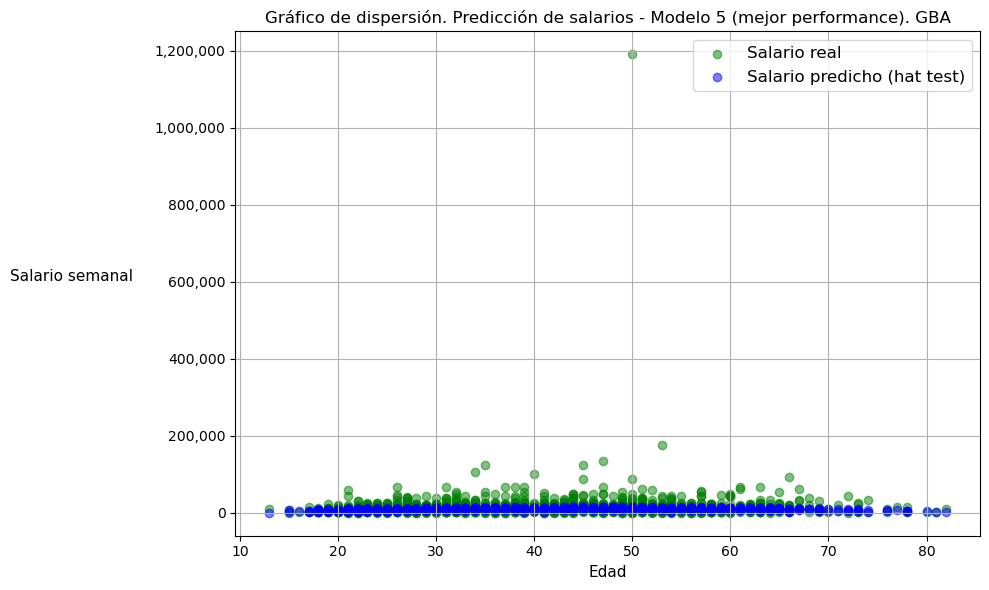

In [15]:
# Parte B - Punto 4
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Gráfico de dispersión para el modelo de mejor performance

# Vamos a usar las predicciones del modelo 5, ya que este presenta el menor MSE y MAE de testeo.
variables_modelo_5 = ['edad', 'edad2', 'intercepto', 'educ', 'mujer', 'vp_dummy', 'lee_dummy']
x_test_ocu['educ'] = x_test_ocu['educ'].fillna(x_test_ocu['educ'].median())
x_test_ocu['vp_dummy'] = x_test_ocu['vp_dummy'].fillna(x_test_ocu['vp_dummy'].mode()[0])
x_test_ocu['lee_dummy'] = x_test_ocu['lee_dummy'].fillna(x_test_ocu['lee_dummy'].mode()[0])
x_test_ocu = x_test_ocu.loc[y_test_ocu.index]

X_test_5 = x_test_ocu[variables_modelo_5].replace([np.nan, np.inf, -np.inf], 0)
y_pred_5 = results_i.predict(X_test_5)

# Creamos un DataFrame para graficar
df_grafico_5 = X_test_5.copy()
df_grafico_5["edad"] = x_test_ocu["edad"]
df_grafico_5["salario_semanal"] = y_test_ocu["salario_semanal"].values
df_grafico_5["salario_semanal_hat_test"] = y_pred_5.values

# Realizamos el gráfico de scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_grafico_5["edad"], df_grafico_5["salario_semanal"], color="green", alpha=0.5, label="Salario real")
plt.scatter(df_grafico_5["edad"], df_grafico_5["salario_semanal_hat_test"], color="blue", alpha=0.5, label="Salario predicho (hat test)")

plt.xlabel("Edad", fontsize=11)
plt.ylabel("Salario semanal", rotation=0, labelpad=60, fontsize=11)
plt.title("Gráfico de dispersión. Predicción de salarios - Modelo 5 (mejor performance). GBA", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig("scatter_modelo5.png", bbox_inches="tight", dpi=300)
plt.show()